### **Import Library**

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from pygam import LinearGAM, s
import logging
import plotly.express as px
import matplotlib.pyplot as plt
# Matikan logger pygam agar output tidak terlalu banyak
logging.getLogger('pygam').setLevel(logging.WARNING)

### **Import Data Hasil Rules**

In [2]:
df = pd.read_csv('D:/kuliah/PA/sakinah-mart/data/rules2023.csv')
df.head()

,Unnamed: 0,antecedents,consequents,support,confidence,lift
0,0,"frozenset({'HARMONY MELON', 'HARMONY LEMON', '...",frozenset({'HARMONY STRAWBERY'}),0.000113,1,1235.260000
1,1,"frozenset({'DELFI TOP TRIP/CHO 9GR', 'MOMOGI J...",frozenset({'MOMOGI CKL 6GR'}),0.000113,1,686.255556
2,2,"frozenset({'INDOMILK KID VNL 115ML', 'CLOUD 9 ...",frozenset({'CLOUD 9 CHOCO 15 4G'}),0.000113,1,571.879630
3,3,"frozenset({'CLOUD 9 VANILA 15 4G', 'INDOMILK K...",frozenset({'CLOUD 9 CHOCO 15 4G'}),0.000146,1,571.879630
4,4,"frozenset({'INDOMILK KID VNL 115ML', 'CLOUD 9 ...",frozenset({'CLOUD 9 CHOCO 15 4G'}),0.000146,1,571.879630


In [3]:
# Pastikan semua elemen dalam kolom antecedents dan consequents adalah frozenset
df["antecedents"] = df["antecedents"].apply(lambda x: frozenset(eval(x)) if isinstance(x, str) else x)
df["consequents"] = df["consequents"].apply(lambda x: frozenset(eval(x)) if isinstance(x, str) else x)

# Mengambil semua item unik
all_items = set()
for col in ["antecedents", "consequents"]:
    for items in df[col]:
        all_items.update(items)

all_items

{'BIG BLUEBRRY 375ML',
 'CIPTADENT PG FRS 190ML',
 'CLOUD 9 CHOCO 15 4G',
 'CLOUD 9 VANILA 15 4G',
 'DELFI TOP TRIP/CHO 9GR',
 'EKONOMI E900K',
 'HARMONY LEMON',
 'HARMONY MELON',
 'HARMONY ORANGE',
 'HARMONY STRAWBERY',
 'HERS PROT SCM 60 S',
 'INDOMIE AYAM BAWANG',
 'INDOMIE AYAM SPECIAL',
 'INDOMIE GRG SPECIAL',
 'INDOMIE SOTO MIE',
 'INDOMILK KID CKL 115ML',
 'INDOMILK KID STR 115ML',
 'INDOMILK KID VNL 115ML',
 'INDOMILK STR 190ML BTL',
 'KRIPIK SGKG TURBO 180G',
 'MOMOGI CKL 6GR',
 'MOMOGI JGG BKR 6GR',
 'NUVO SOAP BLUE 72G',
 'NUVO SOAP YLOW 72G',
 'OREO SOFT CAKE 16GR',
 'PARAMEX SKT KEPALA',
 'PUCUK HARUM TEH 350ML',
 'ROMA KELAPA 300GR',
 'SUNSILK SHP BLK SHN 160ML',
 'TEH GELAS ORI 170ML',
 'TONGTJI JASMINE 5 S',
 'TWISTER MINI CPP 20GR',
 'WAFELLO COCONUT 37 5G',
 'WALLS POPULAIRE STR',
 'YA KOPI SPESIAL 60GR'}

### **Import Data Transaksi**

In [4]:
groceries = pd.read_excel('D:/kuliah/PA/sakinah-mart/data/final_data2023.xlsx')
groceries

,TANGGAL,NO TRANSAKSI,NAMA BARANG,QTY
0,2023-01-01,2301011000001,FORVITA MARG 200GR,2
1,2023-01-01,2301011000002,SASA SANTAN KLPA 65ML,3
2,2023-01-01,2301011000003,CHEERS 1500ML GREEN,1
3,2023-01-01,2301011000004,SUN KARA 65ML,1
4,2023-01-01,2301011000004,OREO PIKACHU 165 6GR,1
...,...,...,...,...
162975,2023-12-31,2312311020112,KONIDIN 4 S,2
162976,2023-12-31,2312311020113,GOLDA CAPPUCINO 200ML,1
162977,2023-12-31,2312311020113,FLORIDINA ORANGE 360ML,1
162978,2023-12-31,2312311020114,WALLS PP TRICO/48,1


### **Filter Data Transaksi**

In [5]:
df_filtered = groceries[groceries['NAMA BARANG'].isin(all_items)]
df_filtered 

,TANGGAL,NO TRANSAKSI,NAMA BARANG,QTY
9,2023-01-01,2301011000008,OREO SOFT CAKE 16GR,2
34,2023-01-01,2301011000018,PUCUK HARUM TEH 350ML,6
62,2023-01-01,2301011000034,ROMA KELAPA 300GR,1
96,2023-01-01,2301011000040,INDOMIE AYAM BAWANG,1
100,2023-01-01,2301011000041,YA KOPI SPESIAL 60GR,1
...,...,...,...,...
162895,2023-12-31,2312311020095,INDOMIE GRG SPECIAL,4
162902,2023-12-31,2312311020096,INDOMIE GRG SPECIAL,4
162944,2023-12-31,2312311020102,INDOMIE GRG SPECIAL,2
162946,2023-12-31,2312311020102,INDOMIE SOTO MIE,2


In [6]:
# Menampilkan jumlah unik nama barang
jumlah_nama_barang = df_filtered['NAMA BARANG'].nunique()
print("Jumlah nama barang unik:", jumlah_nama_barang)

# Menampilkan isi nama barang yang unik
nama_barang_unik = df_filtered['NAMA BARANG'].unique()
print("Nama barang unik:")
for nama in nama_barang_unik:
    print("-", nama)

Jumlah nama barang unik: 35
Nama barang unik:
- OREO SOFT CAKE 16GR
- PUCUK HARUM TEH 350ML
- ROMA KELAPA 300GR
- INDOMIE AYAM BAWANG
- YA KOPI SPESIAL 60GR
- INDOMILK KID CKL 115ML
- INDOMILK STR 190ML BTL
- EKONOMI E900K
- INDOMILK KID STR 115ML
- TWISTER MINI CPP 20GR
- INDOMIE GRG SPECIAL
- INDOMIE AYAM SPECIAL
- WALLS POPULAIRE STR
- MOMOGI CKL 6GR
- HARMONY ORANGE
- HARMONY LEMON
- NUVO SOAP BLUE 72G
- NUVO SOAP YLOW 72G
- TONGTJI JASMINE 5 S
- INDOMIE SOTO MIE
- MOMOGI JGG BKR 6GR
- PARAMEX SKT KEPALA
- KRIPIK SGKG TURBO 180G
- SUNSILK SHP BLK SHN 160ML
- BIG BLUEBRRY 375ML
- HARMONY STRAWBERY
- HERS PROT SCM 60 S
- TEH GELAS ORI 170ML
- DELFI TOP TRIP/CHO 9GR
- CLOUD 9 CHOCO 15 4G
- CLOUD 9 VANILA 15 4G
- HARMONY MELON
- CIPTADENT PG FRS 190ML
- WAFELLO COCONUT 37 5G
- INDOMILK KID VNL 115ML


### **Agregasi Data Mingguan**

In [7]:
# Agregasi jumlah QTY per tanggal dan nama barang
df_grouped = df_filtered.groupby(['TANGGAL', 'NAMA BARANG'], as_index=False)['QTY'].sum()

tanggal_range = pd.date_range(start='2023-01-01', end='2023-12-31')
all_items = df_filtered['NAMA BARANG'].unique()

# Buat kombinasi semua tanggal dan item
multi_index = pd.MultiIndex.from_product([tanggal_range, all_items], names=['TANGGAL', 'NAMA BARANG'])
all_combinations = pd.DataFrame(index=multi_index).reset_index()

# Gabungkan dengan hasil groupby
df_joined = pd.merge(all_combinations, df_grouped, on=['TANGGAL', 'NAMA BARANG'], how='left')
df_joined['QTY'] = df_joined['QTY'].fillna(0)

# Pastikan TANGGAL dalam datetime
df_joined['TANGGAL'] = pd.to_datetime(df_joined['TANGGAL'])

# Urutkan dulu datanya
df_joined = df_joined.sort_values('TANGGAL')

# Ambil tanggal paling awal
start_date = df_joined['TANGGAL'].min()

# Hitung minggu ke-n secara manual (tiap 7 hari)
df_joined['WEEK_NUMBER'] = ((df_joined['TANGGAL'] - start_date).dt.days // 7) + 1

# Agregasi berdasarkan minggu dan nama barang
df_weekly = df_joined.groupby(['WEEK_NUMBER', 'NAMA BARANG'], as_index=False)['QTY'].sum()

# (Opsional) Tambahkan kolom tanggal mulai minggu
df_weekly['TANGGAL'] = start_date + pd.to_timedelta((df_weekly['WEEK_NUMBER'] - 1) * 7, unit='D')

# Visualisasi
fig = px.line(df_weekly, x='TANGGAL', y='QTY', color='NAMA BARANG',
              title='Jumlah Penjualan per Minggu (Setiap 7 Hari)')
fig.update_layout(legend_title_text='Klik untuk tampilkan/sembunyikan item')
fig.show()

In [8]:
df_weekly

,WEEK_NUMBER,NAMA BARANG,QTY,TANGGAL
0,1,BIG BLUEBRRY 375ML,1.0,2023-01-01
1,1,CIPTADENT PG FRS 190ML,0.0,2023-01-01
2,1,CLOUD 9 CHOCO 15 4G,0.0,2023-01-01
3,1,CLOUD 9 VANILA 15 4G,0.0,2023-01-01
4,1,DELFI TOP TRIP/CHO 9GR,0.0,2023-01-01
...,...,...,...,...
1850,53,TONGTJI JASMINE 5 S,0.0,2023-12-31
1851,53,TWISTER MINI CPP 20GR,0.0,2023-12-31
1852,53,WAFELLO COCONUT 37 5G,1.0,2023-12-31
1853,53,WALLS POPULAIRE STR,0.0,2023-12-31


### **Pivot Data**

In [9]:
df_pivoted= df_weekly.pivot(index='TANGGAL', columns='NAMA BARANG', values='QTY')
df_pivoted.columns.name = None  # hilangkan nama kolom atas
df_pivoted = df_pivoted.reset_index() 
df_pivoted.head()

,TANGGAL,BIG BLUEBRRY 375ML,CIPTADENT PG FRS 190ML,CLOUD 9 CHOCO 15 4G,CLOUD 9 VANILA 15 4G,DELFI TOP TRIP/CHO 9GR,EKONOMI E900K,HARMONY LEMON,HARMONY MELON,HARMONY ORANGE,...,PARAMEX SKT KEPALA,PUCUK HARUM TEH 350ML,ROMA KELAPA 300GR,SUNSILK SHP BLK SHN 160ML,TEH GELAS ORI 170ML,TONGTJI JASMINE 5 S,TWISTER MINI CPP 20GR,WAFELLO COCONUT 37 5G,WALLS POPULAIRE STR,YA KOPI SPESIAL 60GR
0,2023-01-01,1.0,0.0,0.0,0.0,0.0,6.0,3.0,0.0,3.0,...,3.0,65.0,11.0,1.0,2.0,7.0,6.0,0.0,20.0,4.0
1,2023-01-08,2.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,...,4.0,52.0,2.0,1.0,2.0,1.0,3.0,0.0,5.0,2.0
2,2023-01-15,4.0,0.0,0.0,0.0,4.0,2.0,3.0,0.0,0.0,...,0.0,41.0,5.0,1.0,0.0,0.0,1.0,0.0,8.0,3.0
3,2023-01-22,1.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,...,0.0,31.0,7.0,0.0,0.0,5.0,2.0,0.0,7.0,3.0
4,2023-01-29,1.0,0.0,5.0,6.0,7.0,5.0,1.0,0.0,4.0,...,2.0,42.0,11.0,3.0,0.0,4.0,4.0,0.0,6.0,6.0


In [10]:
# 1. Pisahkan kolom tanggal dan kolom produk
produk_df = df_pivoted.drop(columns=["TANGGAL"])

# 2. Hitung jumlah 0 per kolom
zero_counts = (produk_df == 0).sum()

# 3. Ambil item yang jumlah 0-nya <= 5
filtered_items = zero_counts[zero_counts <= 5].index

# 4. Filter dataframe hanya dengan item yang lolos kriteria 0
filtered_df = produk_df[filtered_items]

# 5. Hitung total penjualan per item
total_sales = filtered_df.sum().sort_values(ascending=False).index

# 6. Ambil 15 item dengan total penjualan tertinggi
# top_3_items = total_sales.head(15).index

# 7. Final dataframe dengan 15 item terbaik
df_final = df_pivoted[["TANGGAL"] + total_sales.tolist()]

In [11]:
df_final.head()

,TANGGAL,INDOMIE GRG SPECIAL,PUCUK HARUM TEH 350ML,INDOMIE SOTO MIE,INDOMIE AYAM BAWANG,INDOMILK KID STR 115ML,WALLS POPULAIRE STR,INDOMIE AYAM SPECIAL,OREO SOFT CAKE 16GR,ROMA KELAPA 300GR,INDOMILK STR 190ML BTL,NUVO SOAP YLOW 72G,KRIPIK SGKG TURBO 180G,NUVO SOAP BLUE 72G,YA KOPI SPESIAL 60GR
0,2023-01-01,174.0,65.0,12.0,14.0,13.0,20.0,8.0,11.0,11.0,7.0,9.0,3.0,10.0,4.0
1,2023-01-08,133.0,52.0,18.0,5.0,1.0,5.0,12.0,12.0,2.0,2.0,1.0,1.0,4.0,2.0
2,2023-01-15,133.0,41.0,14.0,6.0,8.0,8.0,6.0,0.0,5.0,8.0,4.0,0.0,5.0,3.0
3,2023-01-22,123.0,31.0,10.0,26.0,6.0,7.0,0.0,4.0,7.0,1.0,1.0,0.0,0.0,3.0
4,2023-01-29,84.0,42.0,12.0,12.0,11.0,6.0,0.0,7.0,11.0,6.0,12.0,0.0,15.0,6.0


In [12]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   TANGGAL                 53 non-null     datetime64[ns]
 1   INDOMIE GRG SPECIAL     53 non-null     float64       
 2   PUCUK HARUM TEH 350ML   53 non-null     float64       
 3   INDOMIE SOTO MIE        53 non-null     float64       
 4   INDOMIE AYAM BAWANG     53 non-null     float64       
 5   INDOMILK KID STR 115ML  53 non-null     float64       
 6   WALLS POPULAIRE STR     53 non-null     float64       
 7   INDOMIE AYAM SPECIAL    53 non-null     float64       
 8   OREO SOFT CAKE 16GR     53 non-null     float64       
 9   ROMA KELAPA 300GR       53 non-null     float64       
 10  INDOMILK STR 190ML BTL  53 non-null     float64       
 11  NUVO SOAP YLOW 72G      53 non-null     float64       
 12  KRIPIK SGKG TURBO 180G  53 non-null     float64     

In [13]:
# Ubah kolom TANGGAL menjadi datetime
df_final["TANGGAL"] = pd.to_datetime(df_final["TANGGAL"])

# Ubah dari wide ke long format agar cocok untuk plotly express
df_long = df_final.melt(id_vars="TANGGAL", var_name="NAMA BARANG", value_name="QTY")

# Buat line chart
fig = px.line(
    df_long,
    x="TANGGAL",
    y="QTY",
    color="NAMA BARANG",
    title="Jumlah Penjualan per Minggu per Item",
    markers=True,
    labels={"TANGGAL": "Tanggal", "QTY": "Jumlah Terjual", "NAMA BARANG": "Nama Produk"},
    hover_data={"TANGGAL": True, "QTY": True, "NAMA BARANG": True}
)

# Layout tambahan
fig.update_layout(
    legend_title_text='Klik nama produk untuk tampilkan/sembunyikan',
    xaxis_title='Tanggal',
    yaxis_title='Jumlah Terjual',
    template='plotly_white',
    height=500,
    width=900
)

fig.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_15244\2313548066.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [14]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   TANGGAL                 53 non-null     datetime64[ns]
 1   INDOMIE GRG SPECIAL     53 non-null     float64       
 2   PUCUK HARUM TEH 350ML   53 non-null     float64       
 3   INDOMIE SOTO MIE        53 non-null     float64       
 4   INDOMIE AYAM BAWANG     53 non-null     float64       
 5   INDOMILK KID STR 115ML  53 non-null     float64       
 6   WALLS POPULAIRE STR     53 non-null     float64       
 7   INDOMIE AYAM SPECIAL    53 non-null     float64       
 8   OREO SOFT CAKE 16GR     53 non-null     float64       
 9   ROMA KELAPA 300GR       53 non-null     float64       
 10  INDOMILK STR 190ML BTL  53 non-null     float64       
 11  NUVO SOAP YLOW 72G      53 non-null     float64       
 12  KRIPIK SGKG TURBO 180G  53 non-null     float64     

In [15]:
# Mengubah kolom TANGGAL menjadi datetime dan menjadikannya index
df_final['TANGGAL'] = pd.to_datetime(df_final['TANGGAL'])
df_final= df_final.set_index('TANGGAL')
df_final = df_final.asfreq('W-SUN')

df_final.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15244\3619136101.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,INDOMIE GRG SPECIAL,PUCUK HARUM TEH 350ML,INDOMIE SOTO MIE,INDOMIE AYAM BAWANG,INDOMILK KID STR 115ML,WALLS POPULAIRE STR,INDOMIE AYAM SPECIAL,OREO SOFT CAKE 16GR,ROMA KELAPA 300GR,INDOMILK STR 190ML BTL,NUVO SOAP YLOW 72G,KRIPIK SGKG TURBO 180G,NUVO SOAP BLUE 72G,YA KOPI SPESIAL 60GR
TANGGAL,,,,,,,,,,,,,,
2023-01-01,174.0,65.0,12.0,14.0,13.0,20.0,8.0,11.0,11.0,7.0,9.0,3.0,10.0,4.0
2023-01-08,133.0,52.0,18.0,5.0,1.0,5.0,12.0,12.0,2.0,2.0,1.0,1.0,4.0,2.0
2023-01-15,133.0,41.0,14.0,6.0,8.0,8.0,6.0,0.0,5.0,8.0,4.0,0.0,5.0,3.0
2023-01-22,123.0,31.0,10.0,26.0,6.0,7.0,0.0,4.0,7.0,1.0,1.0,0.0,0.0,3.0
2023-01-29,84.0,42.0,12.0,12.0,11.0,6.0,0.0,7.0,11.0,6.0,12.0,0.0,15.0,6.0


In [16]:
# --- Pra-Pemrosesan Data ---
# 1. Mengubah index 'TANGGAL' menjadi kolom biasa (jika TANGGAL adalah index)
if df_final.index.name == 'TANGGAL':
    df_final = df_final.reset_index()
    df_final.rename(columns={'index': 'TANGGAL'}, inplace=True)
elif 'TANGGAL' not in df_final.columns:
    df_final = df_final.reset_index()
    df_final.rename(columns={df_final.columns[0]: 'TANGGAL'}, inplace=True)

# 2. Pastikan kolom 'TANGGAL' adalah tipe datetime
df_final['TANGGAL'] = pd.to_datetime(df_final['TANGGAL'])

# 3. Identifikasi kolom produk
product_columns = [col for col in df_final.columns if col != 'TANGGAL']

# 4. Pastikan kolom produk adalah numerik dan tangani nilai yang tidak bisa diubah
for col in product_columns:
    df_final[col] = pd.to_numeric(df_final[col], errors='coerce')
    df_final[col] = df_final[col].fillna(0)
    df_final[col] = np.maximum(0, df_final[col]) # Pastikan tidak negatif

             MEMULAI FORECASTING DENGAN GAM-VAR DAN EVALUASI             
Total data setelah lagging: 51 titik.
Ukuran data training (80%): 40 titik.
Ukuran data testing (20%): 11 titik.
Jumlah lag (LOOK_BACK): 2



--- Memproses Produk: INDOMIE GRG SPECIAL ---
  - MAE: 31.70
  - RMSE: 40.72
  - MAPE: 41.33%


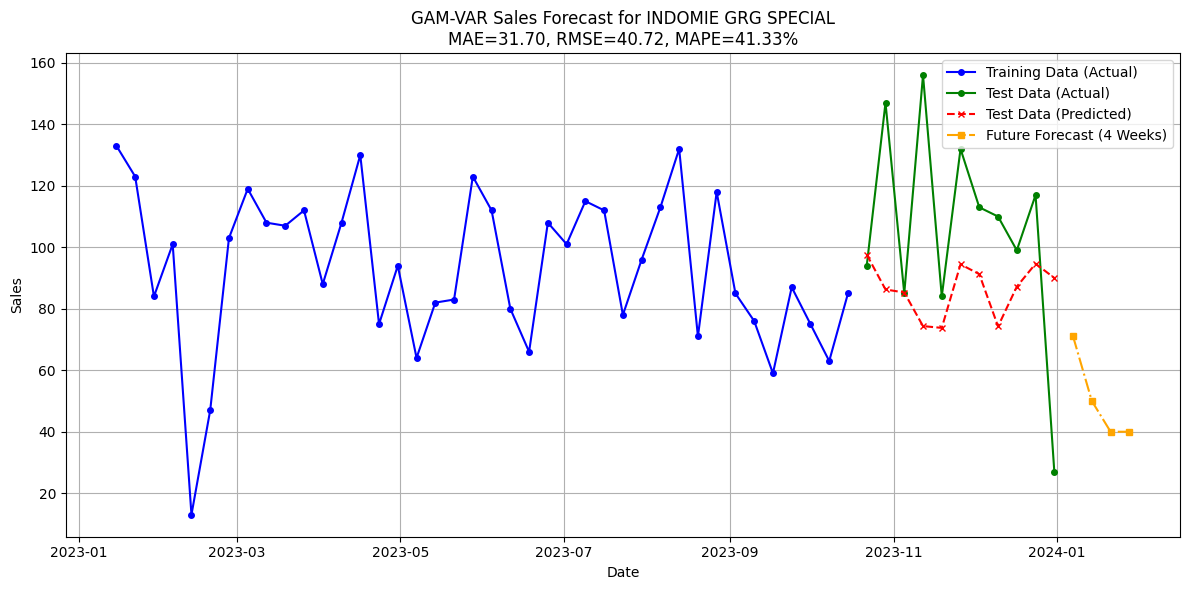


--- Memproses Produk: PUCUK HARUM TEH 350ML ---
  - MAE: 21.57
  - RMSE: 27.30
  - MAPE: 216.92%


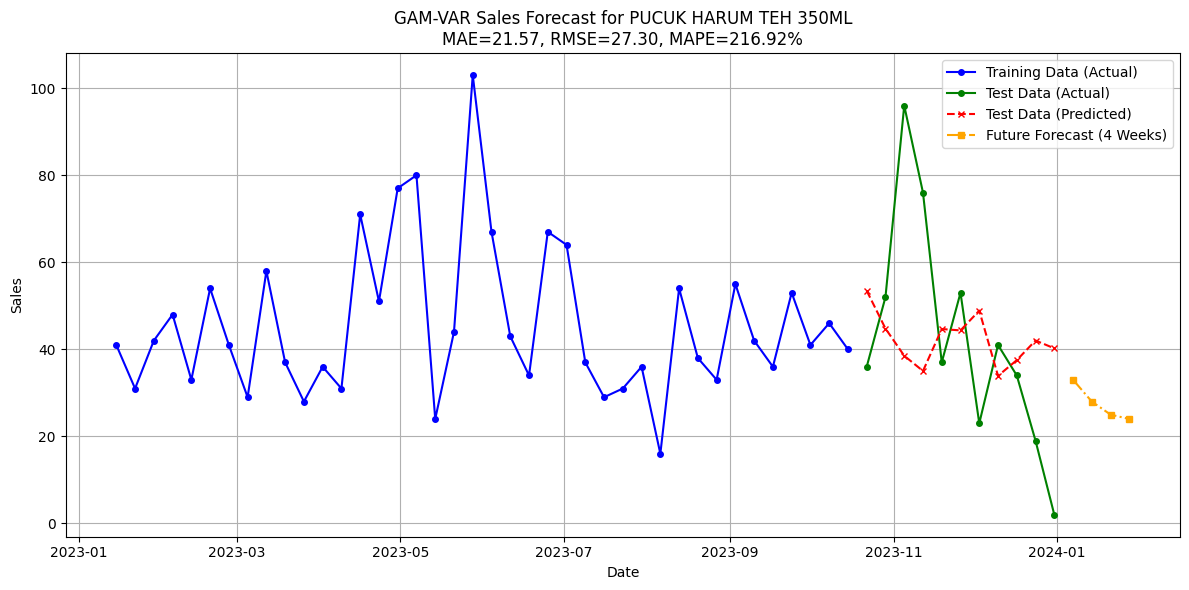


--- Memproses Produk: INDOMIE SOTO MIE ---
  - MAE: 8.23
  - RMSE: 10.18
  - MAPE: 59.08%


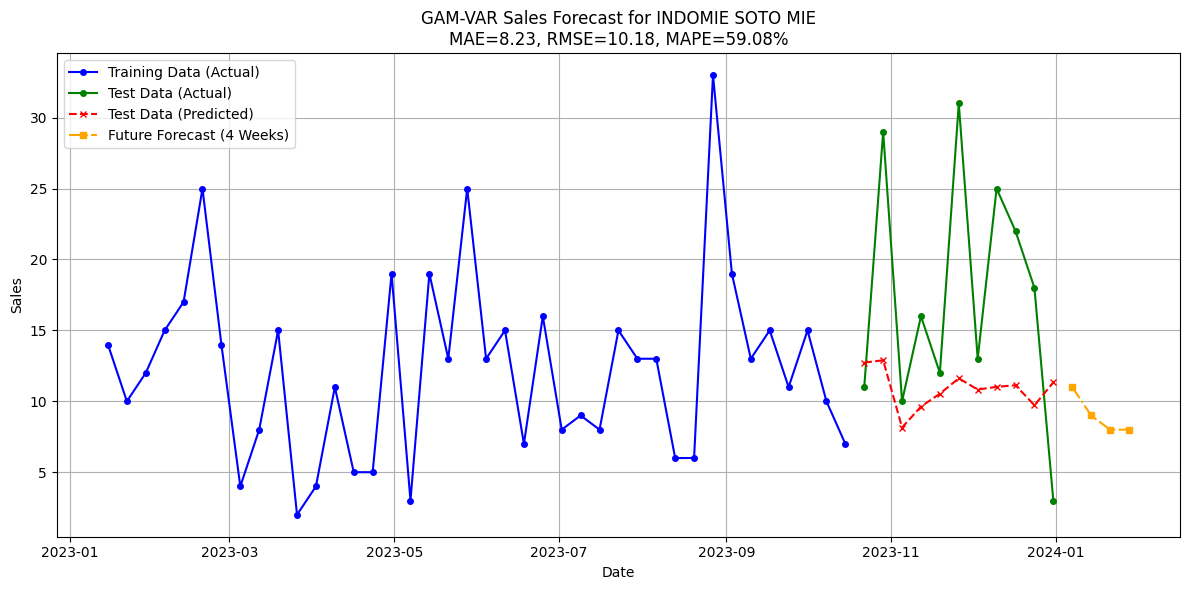


--- Memproses Produk: INDOMIE AYAM BAWANG ---
  - MAE: 5.40
  - RMSE: 6.99
  - MAPE: 69.23%


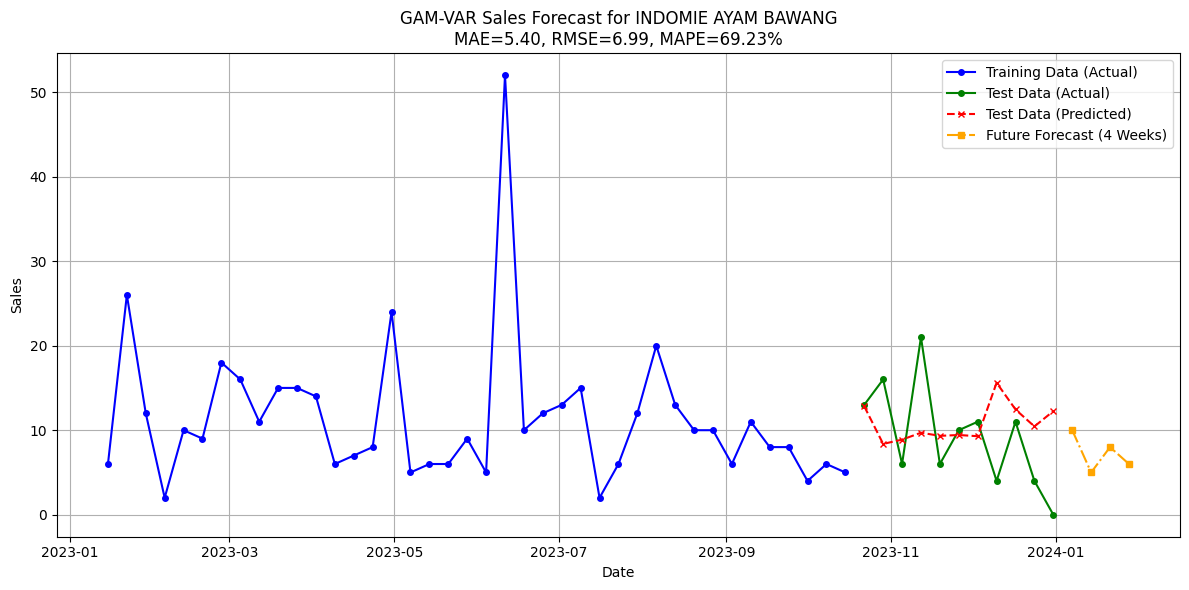


--- Memproses Produk: INDOMILK KID STR 115ML ---
  - MAE: 8.05
  - RMSE: 10.92
  - MAPE: 46.75%


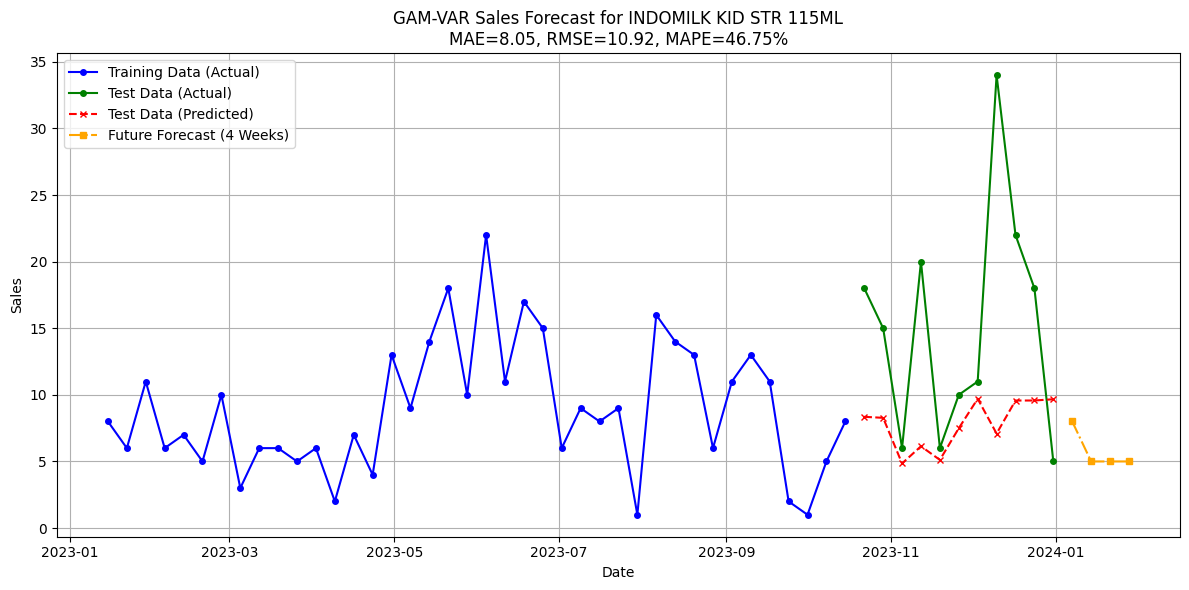


--- Memproses Produk: WALLS POPULAIRE STR ---
  - MAE: 4.01
  - RMSE: 4.81
  - MAPE: 39.24%


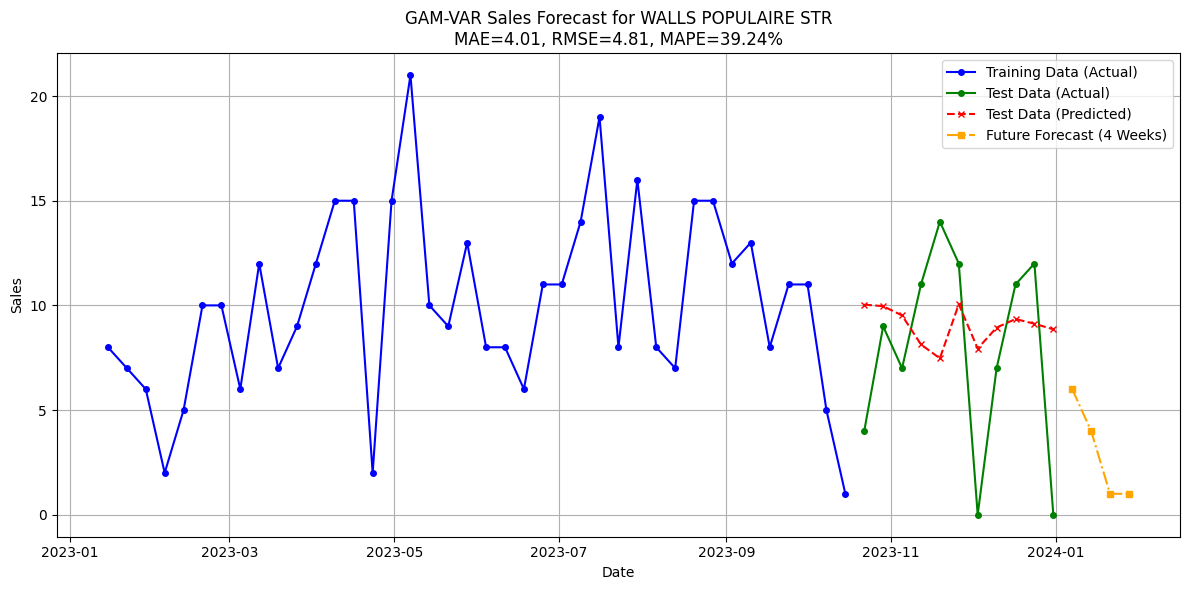


--- Memproses Produk: INDOMIE AYAM SPECIAL ---
  - MAE: 4.26
  - RMSE: 4.97
  - MAPE: 39.04%


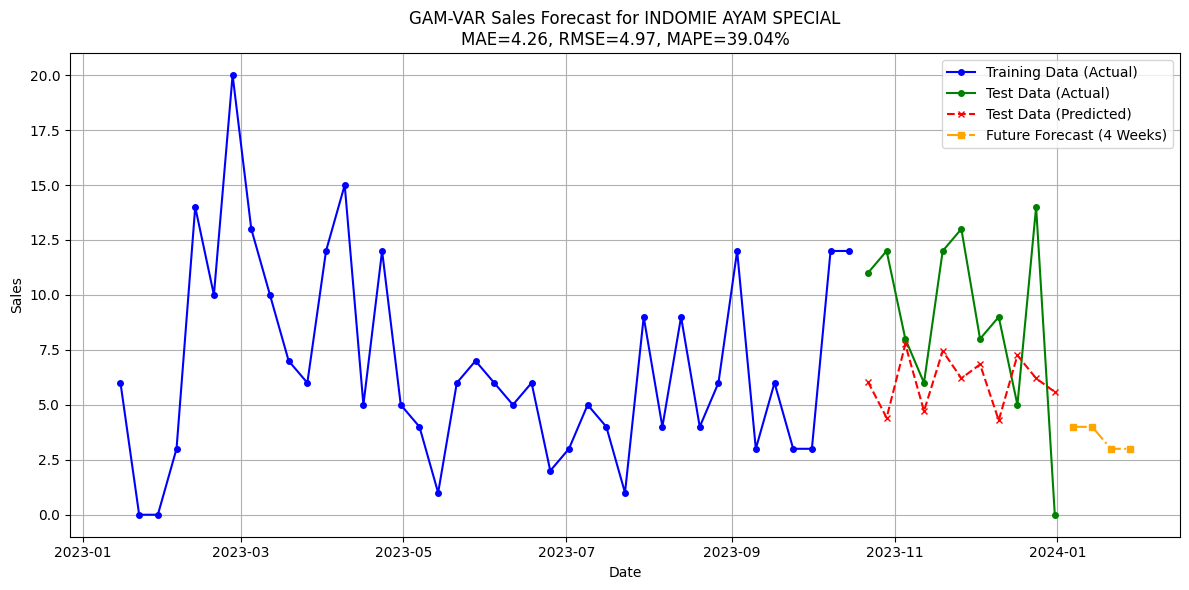


--- Memproses Produk: OREO SOFT CAKE 16GR ---
  - MAE: 4.38
  - RMSE: 5.29
  - MAPE: 88.67%


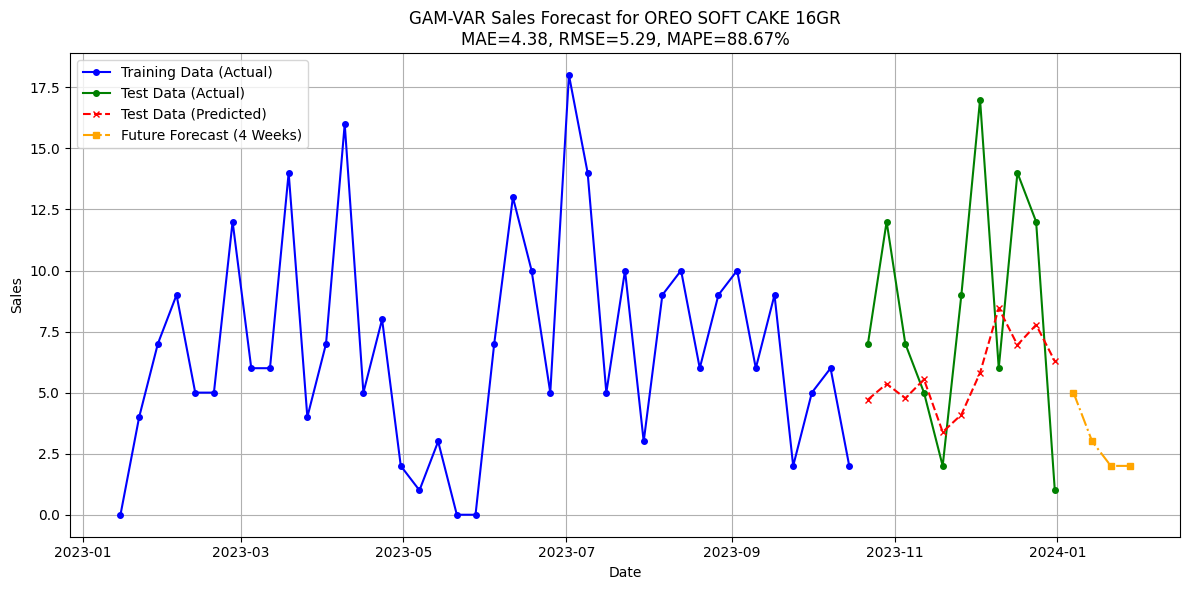


--- Memproses Produk: ROMA KELAPA 300GR ---
  - MAE: 2.89
  - RMSE: 3.54
  - MAPE: 105.46%


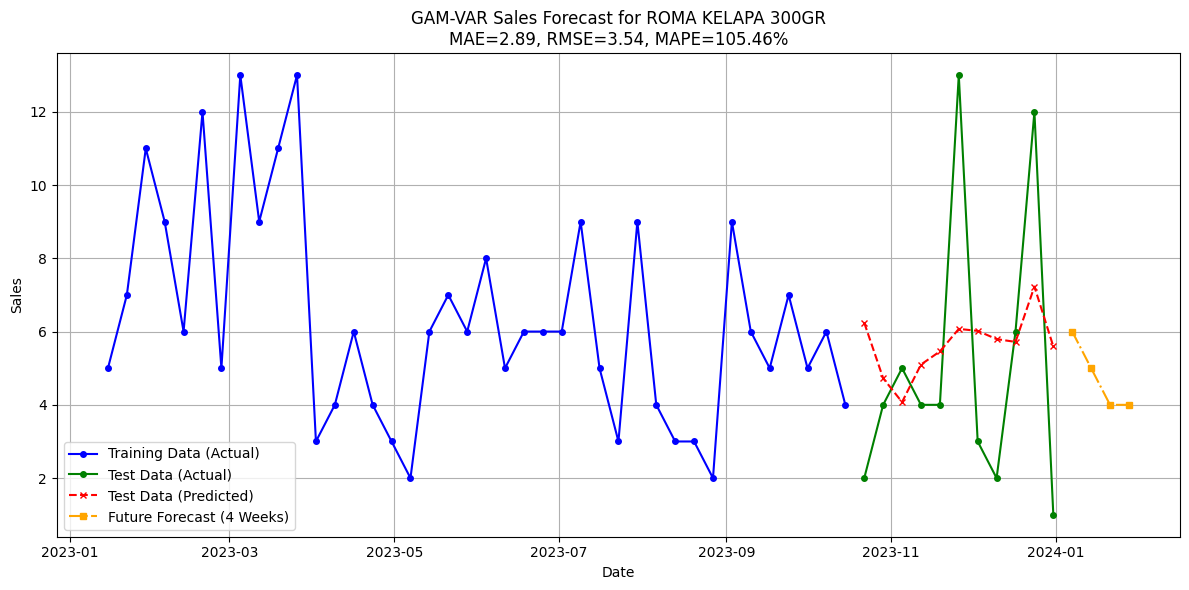


--- Memproses Produk: INDOMILK STR 190ML BTL ---
  - MAE: 4.42
  - RMSE: 5.28
  - MAPE: 78.73%


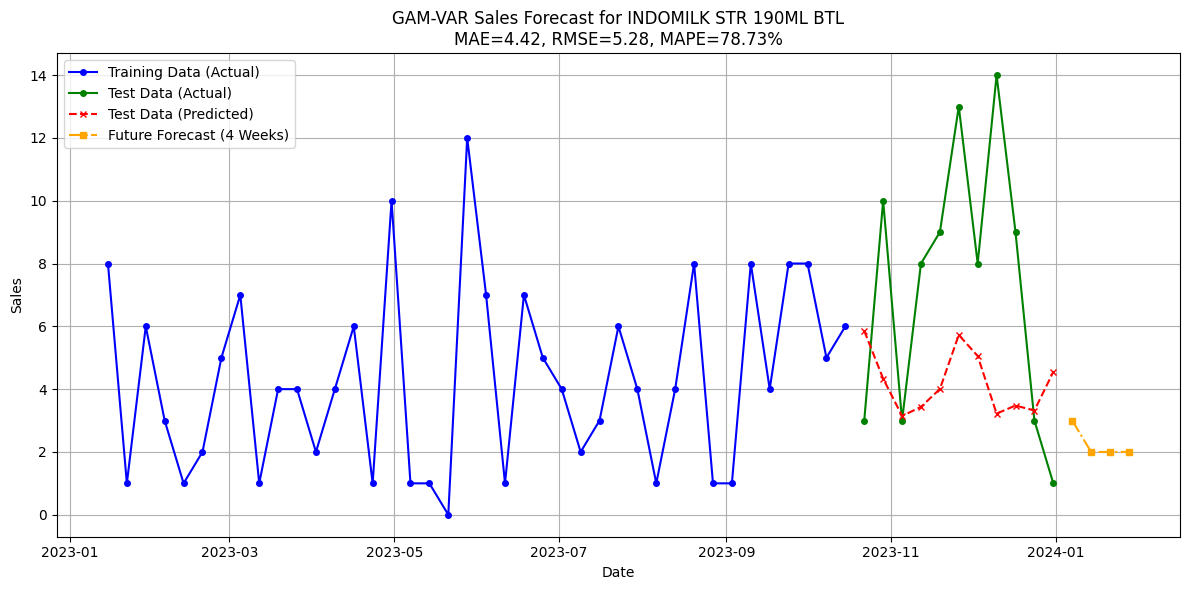


--- Memproses Produk: NUVO SOAP YLOW 72G ---
  - MAE: 2.42
  - RMSE: 2.88
  - MAPE: 114.42%


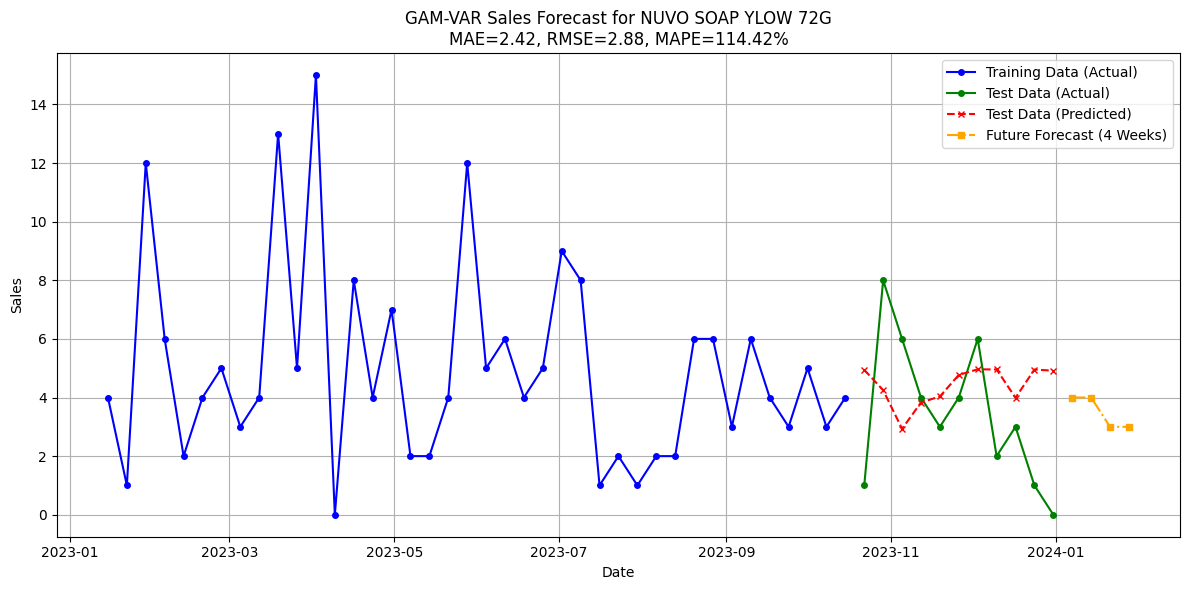


--- Memproses Produk: KRIPIK SGKG TURBO 180G ---
  - MAE: 2.02
  - RMSE: 2.47
  - MAPE: 130.80%


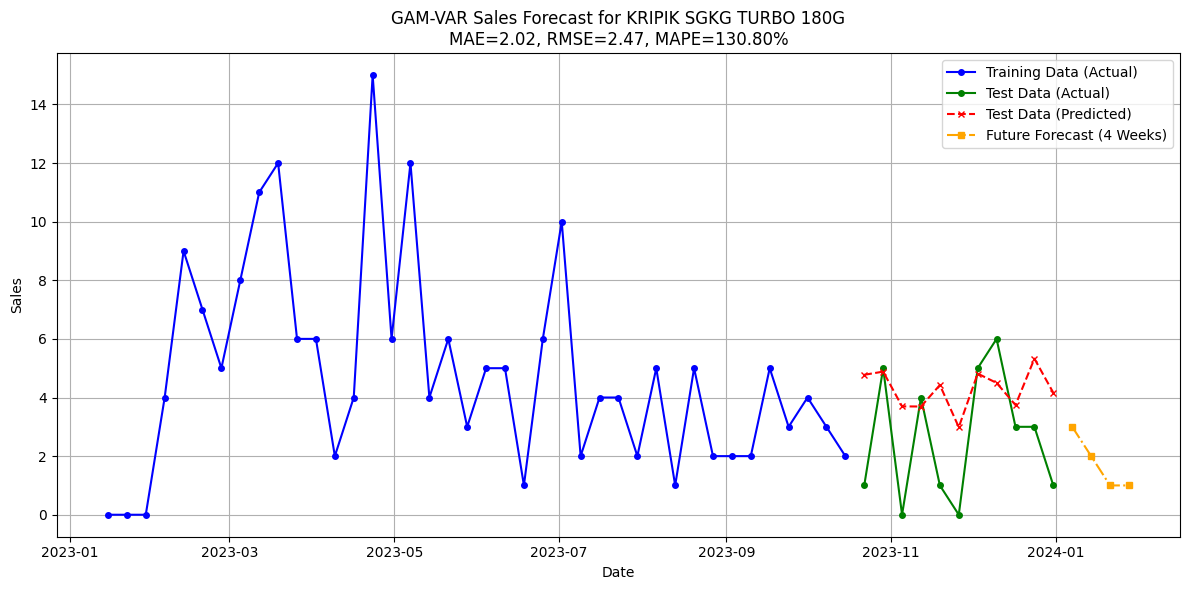


--- Memproses Produk: NUVO SOAP BLUE 72G ---
  - MAE: 3.10
  - RMSE: 3.54
  - MAPE: 61.39%


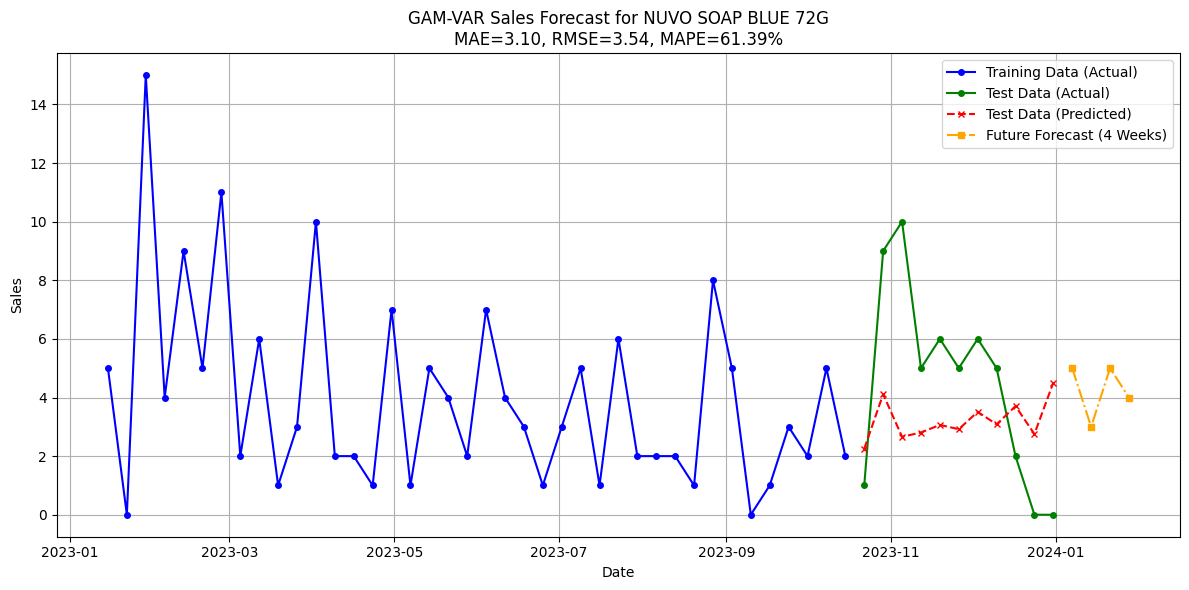


--- Memproses Produk: YA KOPI SPESIAL 60GR ---
  - MAE: 2.60
  - RMSE: 3.59
  - MAPE: 58.31%


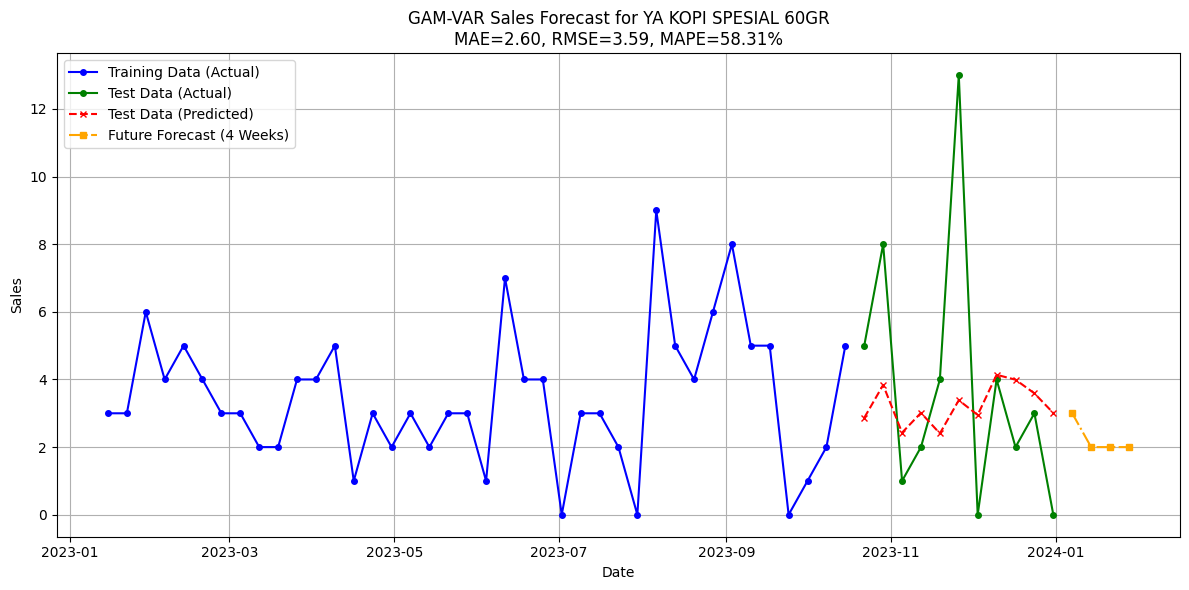



             PROSES FORECASTING DAN EVALUASI SELESAI             

--- Ringkasan Hasil Evaluasi Model (Produk dengan Akurasi Terbaik ke Terjelek) ---
                              MAE       RMSE        MAPE
INDOMIE AYAM SPECIAL     4.264813   4.965447   39.040248
WALLS POPULAIRE STR      4.011211   4.811072   39.240450
INDOMIE GRG SPECIAL     31.696137  40.719977   41.325306
INDOMILK KID STR 115ML   8.045073  10.919784   46.750906
YA KOPI SPESIAL 60GR     2.602500   3.593038   58.309673
INDOMIE SOTO MIE         8.230216  10.182066   59.079184
NUVO SOAP BLUE 72G       3.096923   3.539387   61.392726
INDOMIE AYAM BAWANG      5.395973   6.987702   69.226833
INDOMILK STR 190ML BTL   4.419958   5.283431   78.733592
OREO SOFT CAKE 16GR      4.380768   5.285054   88.672391
ROMA KELAPA 300GR        2.894264   3.543951  105.462467
NUVO SOAP YLOW 72G       2.417764   2.881230  114.416095
KRIPIK SGKG TURBO 180G   2.020399   2.466699  130.796902
PUCUK HARUM TEH 350ML   21.566394  27.299790  216.

In [17]:
# --- Fungsi untuk Menghitung Metrik ---
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))

    non_zero_indices = y_true != 0
    if np.sum(non_zero_indices) > 0:
        mape = np.mean(np.abs((y_true[non_zero_indices] - y_pred[non_zero_indices]) / y_true[non_zero_indices])) * 100
    else:
        mape = np.nan

    return mae, rmse, mape

# --- Hyperparameter GAM-VAR ---
LOOK_BACK = 2
FORECAST_HORIZON = 4

# --- Persiapan Data untuk GAM-VAR (Versi tanpa fitur waktu tambahan) ---
df_features = df_final.copy()
for col in product_columns:
    for i in range(1, LOOK_BACK + 1):
        df_features[f'{col}_lag{i}'] = df_features[col].shift(i)

df_features.dropna(inplace=True)
X_cols = [col for col in df_features.columns if '_lag' in col] # Hanya kolom lagged

if len(df_features) < LOOK_BACK + 2:
    raise ValueError(f"Data historis terlalu sedikit ({len(df_features)} baris setelah lagging) untuk LOOK_BACK={LOOK_BACK}.")

train_size = int(len(df_features) * 0.8)
X_train = df_features[X_cols].iloc[:train_size]
X_test = df_features[X_cols].iloc[train_size:]

print("="*80)
print("             MEMULAI FORECASTING DENGAN GAM-VAR DAN EVALUASI             ")
print("="*80)
print(f"Total data setelah lagging: {len(df_features)} titik.")
print(f"Ukuran data training (80%): {train_size} titik.")
print(f"Ukuran data testing (20%): {len(X_test)} titik.")
print(f"Jumlah lag (LOOK_BACK): {LOOK_BACK}")
print("\n")

gam_models = {}
evaluation_results = {}
future_forecasts_data_list = []

for product in product_columns:
    print(f"\n--- Memproses Produk: {product} ---")

    y_train = df_features[product].iloc[:train_size]
    y_test_actual = df_features[product].iloc[train_size:]

    # Formula GAM: s(i) untuk setiap fitur (default n_splines=10, lam=0.6)
    formula_terms = [s(i) for i in range(X_train.shape[1])]
    
    # Pastikan formula_terms tidak kosong
    if not formula_terms:
        print(f"  Warning: No formula terms created for {product}. Skipping model fitting.")
        evaluation_results[product] = {'MAE': np.nan, 'RMSE': np.nan, 'MAPE': np.nan}
        future_forecasts_data_list.append(np.full(FORECAST_HORIZON, np.nan))
        continue

    formula = formula_terms[0]
    for term in formula_terms[1:]:
        formula += term

    try:
        # Model GAM menggunakan default pyGAM untuk n_splines dan lam
        gam = LinearGAM(formula, fit_intercept=True)
        gam.fit(X_train.values, y_train.values)
        gam_models[product] = gam

        y_pred = gam.predict(X_test.values)
        y_pred[y_pred < 0] = 0

        mae, rmse, mape = calculate_metrics(y_test_actual.values, y_pred)

        print(f"  - MAE: {mae:.2f}")
        print(f"  - RMSE: {rmse:.2f}")
        if pd.isna(mape):
            print(f"  - MAPE: N/A (Semua nilai aktual adalah 0 di periode testing)")
        else:
            print(f"  - MAPE: {mape:.2f}%")

        evaluation_results[product] = {'MAE': mae, 'RMSE': rmse, 'MAPE': mape}

        # --- Prediksi Masa Depan (Recursive/Iterative Forecasting) ---
        product_future_forecast_unscaled = []
        # current_recursive_data hanya berisi data produk, tidak ada fitur waktu
        current_recursive_data = df_final[product_columns].tail(LOOK_BACK).values.copy()

        for k in range(FORECAST_HORIZON):
            X_input_k = []
            for col_name in product_columns:
                for lag_num in range(1, LOOK_BACK + 1):
                    val = current_recursive_data[LOOK_BACK - lag_num, product_columns.index(col_name)]
                    X_input_k.append(val)
            
            X_input_k = np.array(X_input_k).reshape(1, -1)

            predicted_val = gam.predict(X_input_k)[0]
            predicted_val = max(0, round(predicted_val))

            product_future_forecast_unscaled.append(predicted_val)

            new_row_for_recursive_data = np.zeros((1, len(product_columns)))
            new_row_for_recursive_data[0, product_columns.index(product)] = predicted_val
            current_recursive_data = np.concatenate((current_recursive_data[1:], new_row_for_recursive_data), axis=0)

        future_forecasts_data_list.append(np.array(product_future_forecast_unscaled))

        # --- Visualisasi ---
        plt.figure(figsize=(12, 6))
        
        plot_dates_df_features = df_features['TANGGAL']

        plt.plot(plot_dates_df_features.iloc[:train_size], df_features[product].iloc[:train_size],
                 label='Training Data (Actual)', color='blue', marker='o', markersize=4, linestyle='-')
        
        plt.plot(plot_dates_df_features.iloc[train_size:], df_features[product].iloc[train_size:],
                 label='Test Data (Actual)', color='green', marker='o', markersize=4, linestyle='-')
        
        plt.plot(plot_dates_df_features.iloc[train_size:], y_pred,
                 label='Test Data (Predicted)', color='red', marker='x', markersize=4, linestyle='--')
        
        future_plot_dates = pd.date_range(start=df_final['TANGGAL'].iloc[-1] + pd.Timedelta(weeks=1),
                                          periods=FORECAST_HORIZON, freq='W')
        plt.plot(future_plot_dates, product_future_forecast_unscaled,
                 label=f'Future Forecast ({FORECAST_HORIZON} Weeks)', color='orange', marker='s', markersize=4, linestyle='-.')
        
        plt.title(f'GAM-VAR Sales Forecast for {product}\nMAE={mae:.2f}, RMSE={rmse:.2f}, MAPE={mape:.2f}%')
        plt.xlabel('Date')
        plt.ylabel('Sales')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"  Gagal melatih atau memprediksi GAM untuk {product}: {e}")
        evaluation_results[product] = {'MAE': np.nan, 'RMSE': np.nan, 'MAPE': np.nan}
        future_forecasts_data_list.append(np.full(FORECAST_HORIZON, np.nan))


# Buat DataFrame untuk prediksi masa depan (setelah semua loop selesai)
last_historical_date_actual_df = df_final['TANGGAL'].iloc[-1]
future_dates_df_index = pd.date_range(start=last_historical_date_actual_df + pd.Timedelta(weeks=1), periods=FORECAST_HORIZON, freq='W')
future_forecasts_df = pd.DataFrame(np.array(future_forecasts_data_list).T, columns=product_columns, index=future_dates_df_index)
future_forecasts_df.index.name = 'TANGGAL'


print("\n")
print("="*80)
print("             PROSES FORECASTING DAN EVALUASI SELESAI             ")
print("="*80)

# --- 4. Ringkasan Hasil Evaluasi dan Prediksi ---
print("\n--- Ringkasan Hasil Evaluasi Model (Produk dengan Akurasi Terbaik ke Terjelek) ---")

eval_df_summary = pd.DataFrame.from_dict(evaluation_results, orient='index')

# Urutkan DataFrame berdasarkan akurasi (MAPE terendah, lalu MAE terendah)
eval_df_summary_sorted = eval_df_summary.sort_values(by=['MAPE', 'MAE'], ascending=True)

# Tampilkan DataFrame yang sudah terurut
print(eval_df_summary_sorted.to_string())

# --- Tambahkan Ringkasan Metrik Keseluruhan di sini ---
print("\n--- Performa Model Keseluruhan (Rata-rata Lintas Produk) ---")
overall_mae = eval_df_summary_sorted['MAE'].mean()
overall_rmse = eval_df_summary_sorted['RMSE'].mean()
overall_mape = eval_df_summary_sorted['MAPE'].mean()

print(f"Average MAE:  {overall_mae:.2f}")
print(f"Average RMSE: {overall_rmse:.2f}")
if pd.isna(overall_mape):
    print("Average MAPE: N/A (Satu atau lebih produk memiliki semua nilai aktual nol di test set)")
else:
    print(f"Average MAPE: {overall_mape:.2f}%")
# --- Akhir Penambahan ---

print(f"\n--- Prediksi Penjualan untuk {FORECAST_HORIZON} Minggu Ke Depan ---")
print(future_forecasts_df.to_string())

print("\n--- Catatan Penting ---")
print("1. Akurasi model sangat terbatas karena jumlah data historis yang sangat sedikit (53 titik).")
print("2. 'MAPE: N/A' menunjukkan bahwa semua nilai aktual di periode testing adalah 0.")
print("3. Model GAM-VAR di sini adalah implementasi 'GAM per produk dengan fitur VAR-like'.")
print("4. Performa model GAM sangat bergantung pada tuning parameter s() dan lam.")
print("5. Untuk hasil yang lebih andal, diperlukan data historis yang JAUH lebih banyak (minimal beberapa tahun).")